In [2]:
import pandas as pd

df = pd.read_csv(r"C:\Users\User\Desktop\fish_data.csv")
df

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31
...,...,...,...,...
4075,Sillaginopsis panijus,30.56,6.12,0.20
4076,Sillaginopsis panijus,29.66,6.11,0.21
4077,Sillaginopsis panijus,32.81,6.25,0.19
4078,Sillaginopsis panijus,29.78,6.11,0.21


<BarContainer object of 4 artists>

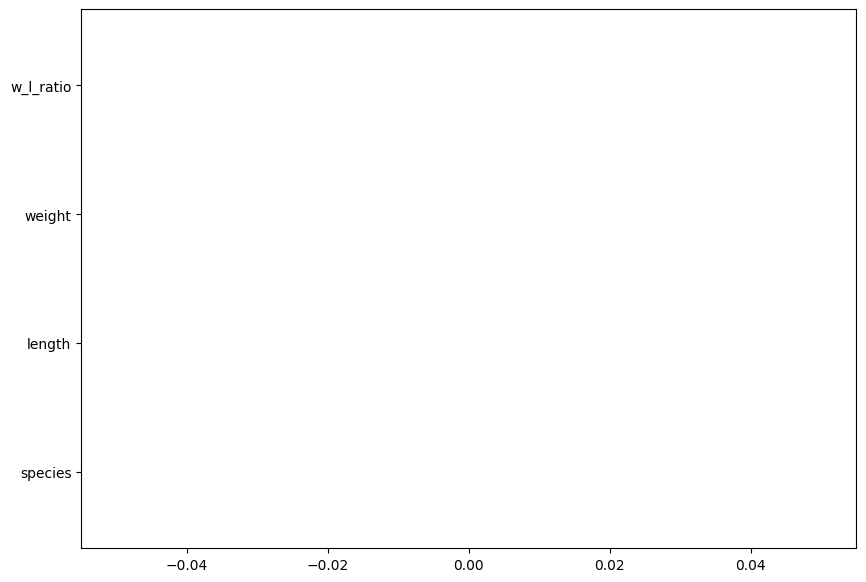

In [5]:
import matplotlib.pyplot as plt

data = df.isna().sum()

plt.figure(figsize=(10,7))

plt.barh(data.index, data.values)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df.drop(['species'], axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, shuffle=True, test_size=0.2, random_state=44)

model = KNeighborsClassifier(n_neighbors=5)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.9301


In [26]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

scores = cross_validate(KNeighborsClassifier(n_neighbors=5), X, y, cv=5, scoring = {'acc': make_scorer(accuracy_score)}, return_train_score=True)

print('accuracy train mean = ', scores['train_acc'].mean())
print('accurary test mean = ', scores['test_acc'].mean())


accuracy train mean =  0.9560049019607844
accurary test mean =  0.9362745098039216
